## Preliminary Analysis

##### Import Fetched 10,000 Twitter Pink Venom Tweet Data

In [1]:
import json
from pprint import pprint

with open('recent_post_pink venom album_10000.json') as infile:
    data = json.load(infile)
    
data.keys()

dict_keys(['collection_type', 'collection_timestamp', 'query', 'tweet_cnt', 'tweets'])

##### With stop words: 10 most popular tweeted key words

In [2]:
from collections import Counter

words = []
for tweet in data['tweets']:
    txt = tweet['text']
    words.extend(txt.split())

Counter(words).most_common(10)

[('RT', 4313),
 ('Pink', 2832),
 ('#1', 2221),
 ('200', 2106),
 ('Shut', 1924),
 ('Venom', 1886),
 ('Down', 1835),
 ('the', 1825),
 ('on', 1821),
 ('100', 1691)]

In [3]:
#Build customed stopwords list for Pink Venom Keyword
#Cited from:https://www.projectpro.io/recipes/add-custom-stopwords-and-then-remove-them-from-text
import pickle
import nltk

with open('data/stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)
stopwords = nltk.corpus.stopwords.words('english')

#Removing 'RT' due to twitter retweet mechanism
newStopWords = ['RT']
stopwords.extend(newStopWords)
print(stopwords, sep="\n")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

##### Without stop words: 10 most popular tweeted key words

In [4]:
words2 = [] # our accumulator list

for w in words:
    if w not in stopwords and len(w) > 1:
        words2.append(w)

c2 = Counter(words2)
c2.most_common(10)

[('Pink', 2832),
 ('#1', 2221),
 ('200', 2106),
 ('Shut', 1924),
 ('Venom', 1886),
 ('Down', 1835),
 ('100', 1691),
 ('Hot', 1618),
 ('Global', 1522),
 ('▫️Billboard', 1507)]

##### 10 most popular hashtags

In [5]:
hashtag_blackpink = []
for w in words2:
    if "#" in w:
        if not ((w.replace("#", "")[0]).isnumeric()): 
        #Ranking Number is used in tweet text, so filtering out the case with #number
            hashtag_blackpink.append(w)

Counter(hashtag_blackpink).most_common(10)

[('#BORNPINK', 694),
 ('#BLACKPINK', 291),
 ('#PinkVenom', 88),
 ('#Official_Audio', 71),
 ('【#BLACKPINK】', 54),
 ('#BLINK', 54),
 ('#PINKVENOM', 14),
 ('#JENNIE:', 14),
 ('#블랙핑크', 11),
 ('#JISOO', 8)]

##### 10 most frequently mentioned usernames

In [6]:
at_blackpink = []
for a in words2:
    if "@" in a:
        at_blackpink.append(a.replace(".", "")) 
        #Due to using "." with @ directly, replace "." with ""

Counter(at_blackpink).most_common(10)

[('@BLACKPINK', 2449),
 ('@BLACKPINKSTATS5:', 979),
 ('@ZEXIONOXIOUS:', 752),
 ('@cryforthepinks:', 412),
 ('@chartsblackpink:', 360),
 ('@minsebornblonk:', 308),
 ('@BLACKPINKGLOBAL:', 270),
 ('@pinkIovesick:', 164),
 ('@UK_BLINKS:', 138),
 ('@lakrandhi95:', 103)]

##### 3 most common sources of the tweets

In [7]:
platform = []
for tweet in data['tweets']:
    source = tweet['source']
    platform.append(source)

Counter(platform).most_common(3)

[('Twitter for Android', 2905),
 ('Twitter for iPhone', 1409),
 ('Twitter Web App', 360)]

##### Line chart representing time trend of tweet counts in 7 days

['2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03'] [697, 2053, 391, 473, 296, 530, 292, 42]


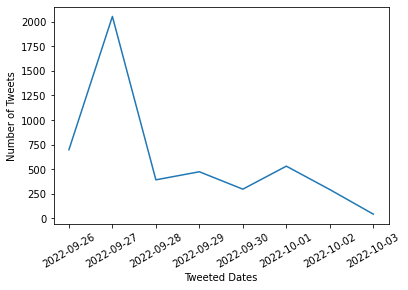

In [8]:
import matplotlib.pyplot as plt
import numpy as np

#Collect tweeted date data within the 7 days timeframe
created_date = []
for tweet in data['tweets']:
    date = tweet['created_at']
    created_date.append(date[:10])

#Gather number of tweets per given date within the 7 days
counted_date = Counter(created_date)
sorted_date = sorted(counted_date)
sorted_count = []
for s_date in sorted_date:
    sorted_count.append(counted_date[s_date])

#Display number of tweets per given data
print(sorted_date, sorted_count)

#Using a Line Chart to graphically present the tweeting trend
plt.plot(sorted_date, sorted_count)
plt.xlabel('Tweeted Dates')
plt.ylabel('Number of Tweets')
plt.xticks(rotation = 30)
#plt.savefig('Number of Tweets by Dates on Pink Ven.om Album.pdf') #In case you would love to download in PDF format
plt.show()

##### 3 most influential tweets on Pink Venom

##### **A tweet’s influence score is the sum of “quote_count”, “reply_count”, “retweet_count”, “like_count”

In [9]:
import pandas as pd

#Collect all tweeted message data within the 7 days timeframe
all_tweet_txt = []
for tweet in data['tweets']:
    txt = tweet['text']
    all_tweet_txt.append(txt)

#Sort tweeted message data to avoid "repeated" same tweets and retweets
filtered_tweet_txt = sorted(Counter(all_tweet_txt))
#Compute tweet influence score
filtered_tweet_txt_score = []
for txt in filtered_tweet_txt:
    for tweet in data['tweets']:
        if txt == tweet['text']:
            pb_metric = tweet['public_metrics']
            score = pb_metric['retweet_count'] + pb_metric['reply_count'] + pb_metric['like_count'] + pb_metric['quote_count']
            filtered_tweet_txt_score.append(score)
            break #No longer needed to repeat for the same tweet text given score is already processed by the loop

#DataFrame Pandas usecase from two lists is cited from: 
#https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/
filtered_tweet_data = {'Tweet Text':filtered_tweet_txt,'Influential Score':filtered_tweet_txt_score}
filtered_tweet_data_df = pd.DataFrame(filtered_tweet_data)
filtered_tweet_data_df.sort_values('Influential Score', ascending=False)[:3]

,Tweet Text,Influential Score
267,RT @AppleMusic: The new era of @BLACKPINK has ...,27752
272,RT @BLACKPINK: [🎧]\n#BLACKPINK 의 선공개 싱글 'Pink ...,20381
269,RT @BLACKPINK: BLACKPINK 2nd Album ‘BORN PINK’...,17253


In [10]:
#Gather all Author IDs made avaiable through the Pink Venom Tweeting within the 7 days
all_author_id = []
for tweet in data['tweets']:
    author_id = tweet['author_id']
    all_author_id.append(author_id)

#Count the most active Author on the Pink Venom topic
counted_author_id = Counter(all_author_id)

#Sort all Author IDs to avoid repetitive data
unique_author_id = sorted(counted_author_id) #Generate unique Author IDs based on counted Author IDs in data set

In [ ]:
#DO NOT RUN; this code is used to get Author information from Twitter server based on the Author IDs
#Cited from: https://piazza.com/class/l6361peonhd70r/post/200, namely for 15 mins limit

import time #added library to deal with Twitter API Rate Limit
import tweepy as tweepy
from TwitterCollector import TwitterCollector
# please fill in your bearer token here
bearer_token = r"AAAAAAAAAAAAAAAAAAAAADHYhQEAAAAAbtIu6du2AZzMdkFCnVQDJUsy%2Bag%3Dby2mJkqdATkGt3ayP46QsMXvHDYGBHHE1uuyglwXihAlJIzUhi"
# initialize a TwitterCollector instance
tc = TwitterCollector(bearer_token = bearer_token)

def get_twitter_author_info(author_id):
    while True:
        try:
            author_info = tc.fetch_author_info(author_id)
            return author_info #return fetched Author Info
        except tweepy.TooManyRequests:
            print('TooManyRequests')
            time.sleep(900) # Rest for 15 mins or 900 seconds to reset Twitter API Rate Limit
        except:
            print('NoneType Twitter Author Data for Author ID: ' + ua_id)
            return None

In [ ]:
#DO NOT RUN; this code is used to save Author information to json file in batch manner
#Cited from: https://www.geeksforgeeks.org/python-convert-list-of-dictionaries-to-json/

unique_author_info_dict = {"author_info":[]}
for i in range(3500, len(unique_author_id)): #change the range to run batches of Author info and append to the file
    author_info = get_twitter_author_info(unique_author_id[i])
    if author_info != None:
        unique_author_info_dict['author_info'].append(author_info)       

#Save Author information into json file using list of dicts
unique_author_info = []
unique_author_info.append(unique_author_info_dict)
json_object = json.dumps(unique_author_info, indent=4, sort_keys=True)
with open("author_info_pink_venom_album.json", "a") as outfile:
    outfile.write(json_object)

In [11]:
#After above json file is saved, use saved Author information for the remaining sections of this project
with open('author_info_pink_venom_album.json') as infile:
    userdata = json.load(infile)

#Collect all Usernames, Profile Names, Author ID, and computed Influencial Score of given fetched Author Data based on previously computed unique Author ID
all_username = []
all_profname = []
all_author_id = []
all_user_score = []
for author in userdata['author_info']:
    #Get Usernames
    username = author['username']
    all_username.append(username)
    #Get Profile Names
    profname = author['name']
    all_profname.append(profname)
    #Get Author IDs
    author_id = author['id']
    all_author_id.append(author_id)
    #Get Public Metrics and compute influencial score
    pb_metric_user = author['public_metrics']
    score_user = pb_metric_user['followers_count'] + pb_metric_user['following_count'] + pb_metric_user['tweet_count'] + pb_metric_user['listed_count']
    all_user_score.append(score_user)

In [12]:
#Using previously counted tweeting activities on the Pink Venom topic, collect topic counts based on gathered Author ID
given_tweet_topic_count = []
for author_id in all_author_id:
    given_tweet_topic_count.append(counted_author_id[author_id])

#DataFrame Pandas usecase from multiple lists is cited from: 
#https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/
all_author_data = {'Username':all_username, 'Author ID': all_author_id, 'Profile Name': all_profname,
                      'Influential Score':all_user_score, 'Tweeted Topic Count': given_tweet_topic_count}
all_author_data_df = pd.DataFrame(all_author_data)

##### 3 most vocal authors on Pink Venom

In [13]:
#Display DataFrame of Author data with focus on Pink Venom tweet topic count
all_author_data_df.sort_values('Tweeted Topic Count', ascending=False)[:3]

,Username,Author ID,Profile Name,Influential Score,Tweeted Topic Count
2529,sirsimonCwll,1566707541043982337,SirSimon Cowell,3299,33
1719,amiinno1,1415227479518707715,amiinno,78354,10
3461,dd12315,969681145,ABC⁰³²⁷,294506,8


##### 3 most influencial authors

In [14]:
#Display DataFrame of Author data with focus on User Inflencial Score
all_author_data_df.sort_values('Influential Score', ascending=False)[:3]

,Username,Author ID,Profile Name,Influential Score,Tweeted Topic Count
2367,inquirerdotnet,15448383,Inquirer,4775745,1
2708,soslalisa,260390523,jon,2123837,1
1906,ZSinein,1446021164,ŠⓘⓝⓔⓘN۫🎉👷🏻‍♀️,1387229,1


## Word Cloud

In [15]:
#Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

In [16]:
# our string accumulator
text2 = ''
for word in words2:
    if len(word) == 1 or word in stopwords:
        continue
    text2 = text2 + ' ' + word

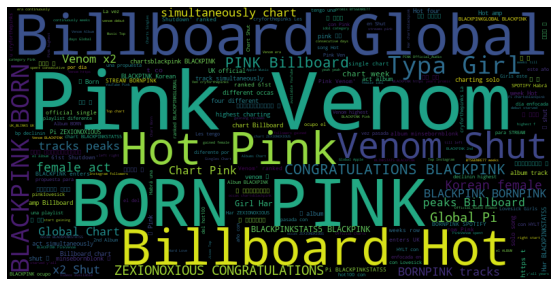

In [17]:
#Generate word cloud using strings
Pink_Venom_Word_Cloud = WordCloud(width=800, height=400).generate(text2)

plt.figure(figsize=(10,5))
plt.imshow(Pink_Venom_Word_Cloud)
#plt.savefig('Pink Venom Word Cloud.png') #In case you would love to download in PNG format
plt.axis('off')

plt.show()

## Sentiment Analysis - Polarity

In [18]:
#Import necessary libraries
from textblob import TextBlob
import matplotlib.pyplot as plt

In [19]:
#Create a list of all tweet texts
tweets_text = []
for tweet in data['tweets']:
    txt = tweet['text']
    tweets_text.append(txt)

#Create a list of polarity scores for all tweet texts without absolute value
tweets_text_polarity=[]
for i in tweets_text:
    tb = TextBlob(i)
    pol = tb.sentiment.polarity
    tweets_text_polarity.append(pol)

##### Average polarity score

In [20]:
avgpol=sum(tweets_text_polarity)/len(tweets_text_polarity)
print("Average of polarity score of all tweets is", round(avgpol,5))

Average of polarity score of all tweets is -0.00671


##### Polarity score distributions visualization

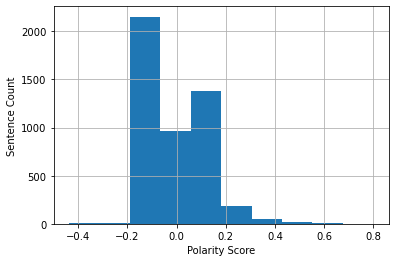

In [21]:
plt.hist(tweets_text_polarity, bins=10) #, normed=1, alpha=0.75)
plt.xlabel('Polarity Score')
plt.ylabel('Sentence Count')
plt.grid(True)
#plt.savefig('Tweets Text Polarity.png') #In case you would love to download in PNG format
plt.show()

## Sentiment Analysis - Subjectivity

In [22]:
#Create a list of subjectivity scores for all tweet texts with absolute value
tweets_text_subjectivity=[]
for i in tweets_text:
    tb = TextBlob(i)
    pol = tb.sentiment.subjectivity
    tweets_text_subjectivity.append(pol)

##### Average subjectivity score

In [23]:
avgsub=sum(tweets_text_subjectivity)/len(tweets_text_subjectivity)
print("Average of subjectivity score of all tweets is", round(avgsub,5))

Average of subjectivity score of all tweets is 0.36446


##### Subjectivity score distributions visualization

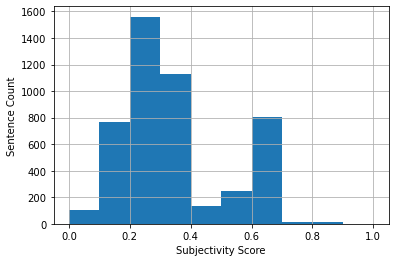

In [24]:
plt.hist(tweets_text_subjectivity, bins=10) #, normed=1, alpha=0.75)

plt.xlabel('Subjectivity Score')
plt.ylabel('Sentence Count')
plt.grid(True)
#plt.savefig('subjectivity.png') #In case you would love to download in PNG format
plt.show()

In [25]:
#Avoid repeated tweets
tweets_text = sorted(Counter(tweets_text))
    
#Create a list of polarity scores for all tweet texts with absolute value
tweets_text_polarity_abs=[]
for i in tweets_text:
        tb = TextBlob(str(i))
        pol = tb.sentiment.polarity
        tweets_text_polarity_abs.append(abs(pol))
        
#Create a list of subjectivity scores for all tweet texts with absolute value
tweets_text_subjectivity_abs=[]
for i in tweets_text:
        tb = TextBlob(str(i))
        pol = tb.sentiment.subjectivity
        tweets_text_subjectivity_abs.append(abs(pol))

In [26]:
#Create DataFrame for Tweet Text and its polarity score and subjectivity score
Tweet_Score = pd.DataFrame({'Tweet Text':tweets_text, 'Polarity':tweets_text_polarity_abs, 'Subjectivity':tweets_text_subjectivity_abs})

#DataFrame Pandas usecase from multiple lists is cited from: 
#https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/

##### 3 lowest polarity scored tweets

In [27]:
Tweet_Score.sort_values(by='Polarity', ascending=True)[0:3]

,Tweet Text,Polarity,Subjectivity
101,@gretchenzenvox https://t.co/N0Efh7VbR1,0.0,0.0
388,RT @walenpink: Ya pero este BOP? https://t.co/...,0.0,0.0
556,はやく帰りたい… https://t.co/FiLESv5qAv,0.0,0.0


##### 3 highest polarity scored tweets

In [28]:
Tweet_Score.sort_values(by='Polarity', ascending=False)[0:3]

,Tweet Text,Polarity,Subjectivity
369,RT @sirsimonCwll: @Legenkillerm2 @KSG_ghostin ...,0.8,0.75
368,RT @sirsimonCwll: @HarukaPark_ @KSG_ghostin @c...,0.8,0.75
375,RT @sirsimonCwll: @listeningRFL @boramussu @ch...,0.8,0.75


##### 3 lowest subjectivity scored tweets

In [29]:
Tweet_Score.sort_values(by='Subjectivity', ascending=True)[0:2]

,Tweet Text,Polarity,Subjectivity
171,AND IT GOES ONE BY ONE AND TWO BY TWO https://...,0.0,0.0
295,RT @Liaamal43799109: Jisoo adalah salah satu o...,0.0,0.0


##### Top highest subjectivity scored tweets

In [30]:
#highest absolute values of subjectivity scores
Tweet_Score.sort_values(by='Subjectivity', ascending=False)[0:1]

,Tweet Text,Polarity,Subjectivity
555,かっこいい(*´ｰ`*) https://t.co/1R4MfklFhh,0.25,1.0
